In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import psutil
import plotly.io as pio
from Unemployment import *
from Suicide import *

In [96]:
sfig = go.Figure()
sfig.add_trace(go.Bar(x=suic_countries_mean.suic_100k, y=suic_countries_mean.index, orientation="h", name="Suicide Rate/100k people"))
sfig.update_layout(legend=dict(x=0,y=1), xaxis=dict(tickmode='linear', tick0=0, dtick=2.5), width=1500, height=800, yaxis=dict(tickmode='linear'))
sfig.update_layout(title='Suicide Mean Rate Per Country per 100k/people (2000 - 2016)', font=dict(family="Arial", size=15))
sfig.show()
sfig.write_html("..\\reports\\html\\suicHBars.html")
sfig.write_image("..\\reports\\png\\suicHBars.png", width=1280, height=960)

Text(0.5, 1.0, 'Suicides Rate per age ranges')

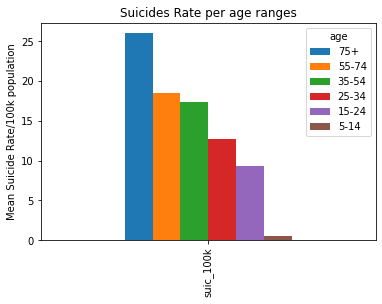

In [91]:
suic_ages_mean = suic_ages_mean.sort_values("suic_100k",ascending=False)
ax = suic_ages_mean.T.plot(kind='bar')
ylab = ax.set_ylabel("Mean Suicide Rate/100k population")
xlab = ax.set_title("age range")
ax.set_title('Suicides Rate per age ranges')

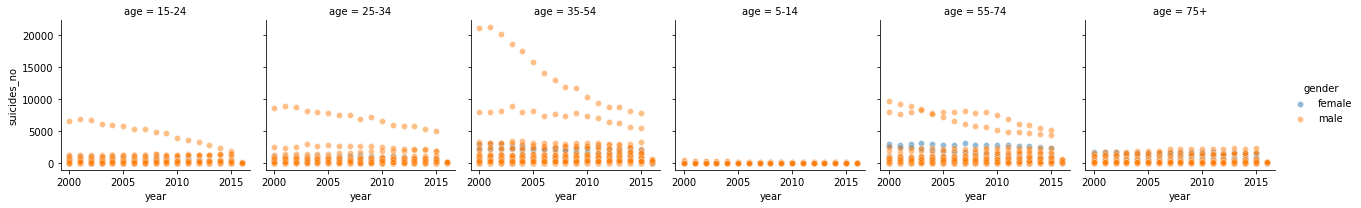

In [93]:
h = sns.FacetGrid(suic, col="age", hue="gender")
h.map(sns.scatterplot, 'year', 'suicides_no', alpha=0.5)
h.add_legend()
h.savefig("..\\reports\\png\\suic_ages_gender_years.png")

In [84]:
fig_s = px.pie(suic, values='suicides_no', names='gender', title='Suicide Ratio per Gender, 2000-2016')    #using total number of suicides for a more descriptive info about each age range
fig_s.show()
fig_s.write_html("..\\reports\\html\\suicPieGender.html")
fig_s.write_image("..\\reports\\png\\suicPieGender.png")

In [34]:
suic_country_gender = suic.drop(columns=["population"])
suic_country_gender = suic_country_gender[["country", "gender", "suic_100k"]].groupby(["country", "gender"]).mean()
suic_country_gender

suic_100k
country        gender           
Australia      female   5.079111
               male    18.199778
Austria        female   7.734804
               male    30.177059
Belgium        female   9.251354
...                          ...
Switzerland    male    26.370417
Turkey         female   1.153333
               male     3.588810
United Kingdom female   2.936667
               male    10.602604

[86 rows x 1 columns]

In [46]:
suic_country_age = suic.drop(columns=["population"])
suic_country_age = suic_country_age[["country", "age", "suic_100k"]].groupby(["country", "age"]).mean()
suic_country_age

suic_100k
country        age             
Australia      15-24  10.804000
               25-34  15.475667
               35-54  16.454000
               5-14    0.431667
               55-74  11.792667
...                         ...
United Kingdom 25-34   9.146875
               35-54  10.986563
               5-14    0.122500
               55-74   7.478438
               75+     7.600625

[258 rows x 1 columns]